## How does Age affect you at the world cup

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import linregress

# File paths
player_shooting_path = "../csv/player_shooting.csv"
player_stats_path = "../csv/player_stats.csv"
player_playing_path ="../csv/player_playingtime.csv"

# Read CSV files
player_stats_df = pd.read_csv(player_stats_path)
player_shooting_df = pd.read_csv(player_shooting_path)
player_playing_df = pd.read_csv(player_playing_path)

In [43]:
player_stats_clean = player_stats_df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,22,24]].copy()

In [44]:
player_shooting_clean = player_shooting_df.iloc[:,[0,7,8,9,10,12]].copy()

In [45]:
player_playing_clean = player_playing_df.iloc[:,[0,7, 11,13]].copy()
list(player_playing_clean)

['player', 'minutes_per_game', 'minutes_per_start', 'games_subs']

In [47]:
# Merge dataframes using the 'player' column as the common key
merged_df = pd.merge(player_stats_clean, player_shooting_clean, on="player", how="inner")
merged_df = pd.merge(merged_df, player_playing_clean, on="player", how="inner")


# Save the merged dataframe to a new CSV file
merged_df.to_csv("merged_player_data.csv", index=False)

# Display the merged dataframe
merged_df_complete = pd.DataFrame(merged_df)
merged_df_complete

,player,position,team,age,club,birth_year,games,games_starts,minutes,minutes_90s,...,xg,xg_assist,shots,shots_on_target,shots_on_target_pct,shots_per90,goals_per_shot,minutes_per_game,minutes_per_start,games_subs
0,Aaron Mooy,MF,Australia,32-094,Celtic,1990,4,4,360,4.0,...,0.0,0.1,1,0,0.0,0.25,0.00,90.0,90.0,0
1,Aaron Ramsey,MF,Wales,31-357,Nice,1990,3,3,266,3.0,...,0.0,0.0,1,0,0.0,0.34,0.00,89.0,89.0,0
2,Abdelhamid Sabiri,MF,Morocco,26-020,Sampdoria,1996,5,2,181,2.0,...,0.1,0.9,3,0,0.0,1.49,0.00,36.0,55.0,3
3,Abdelkarim Hassan,DF,Qatar,29-112,Al Sadd SC,1993,3,3,270,3.0,...,0.3,0.0,6,0,0.0,2.00,0.00,90.0,90.0,0
4,Abderrazak Hamdallah,FW,Morocco,32-001,Al-Ittihad,1990,4,0,68,0.8,...,0.4,0.0,2,1,50.0,2.65,0.00,17.0,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,Ángel Di María,MF,Argentina,34-307,Juventus,1988,5,4,288,3.2,...,0.8,0.6,6,3,50.0,1.87,0.17,58.0,70.0,1
676,Ángelo Preciado,DF,Ecuador,24-303,Genk,1998,3,3,264,2.9,...,0.1,0.4,4,0,0.0,1.36,0.00,88.0,88.0,0
677,Éder Militão,DF,Brazil,24-334,Real Madrid,1998,4,4,347,3.9,...,0.2,0.0,5,1,20.0,1.30,0.00,87.0,87.0,0
678,Óscar Duarte,DF,Costa Rica,33-198,Al-Wehda,1989,3,3,270,3.0,...,0.0,0.3,0,0,NaN,0.00,NaN,90.0,90.0,0


In [48]:
# Count the number of players per team
players_per_team = merged_df_complete.groupby('team')['player'].count().reset_index()

# Display the result
players_per_team

,team,player
0,Argentina,24
1,Australia,20
2,Belgium,20
3,Brazil,26
4,Cameroon,22
5,Canada,19
6,Costa Rica,22
7,Croatia,21
8,Denmark,20
9,Ecuador,18


**Age of Each Player**

In [16]:
# calculate the age of players
current_year = datetime.now().year
merged_df_complete['age'] = current_year - merged_df_complete['birth_year']

# Create a new DataFrame with player name and age
player_age_df = merged_df_complete[['player', 'age']]

# Display the resulting DataFrame
player_age_df

,player,age
0,Aaron Mooy,33
1,Aaron Ramsey,33
2,Abdelhamid Sabiri,27
3,Abdelkarim Hassan,30
4,Abderrazak Hamdallah,33
...,...,...
675,Ángel Di María,35
676,Ángelo Preciado,25
677,Éder Militão,25
678,Óscar Duarte,34


**Average Age of Players per Team**

In [17]:
# Calculate the average age of players per team 
players_age_per_team = merged_df_complete.groupby('team')['age'].mean().round(1).reset_index()

# Rename age column
players_age_per_team = players_age_per_team.rename(columns={'age': 'avg age per team'})

# Display the result
players_age_per_team

,team,avg age per team
0,Argentina,28.4
1,Australia,28.3
2,Belgium,29.3
3,Brazil,29.0
4,Cameroon,27.9
5,Canada,28.7
6,Costa Rica,28.6
7,Croatia,28.8
8,Denmark,28.0
9,Ecuador,25.7


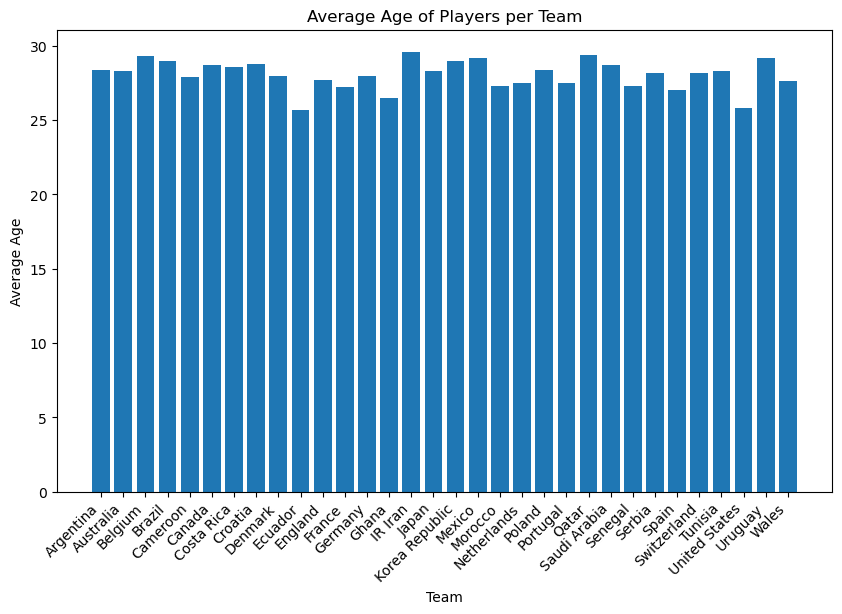

In [20]:
# Plot a bar chart for average age of players per team 
plt.figure(figsize=(10, 6))
plt.bar(players_age_per_team['team'], players_age_per_team['avg age per team'])
plt.title('Average Age of Players per Team')
plt.xlabel('Team')
plt.ylabel('Average Age')
plt.xticks(rotation=45, ha='right') 
plt.show()

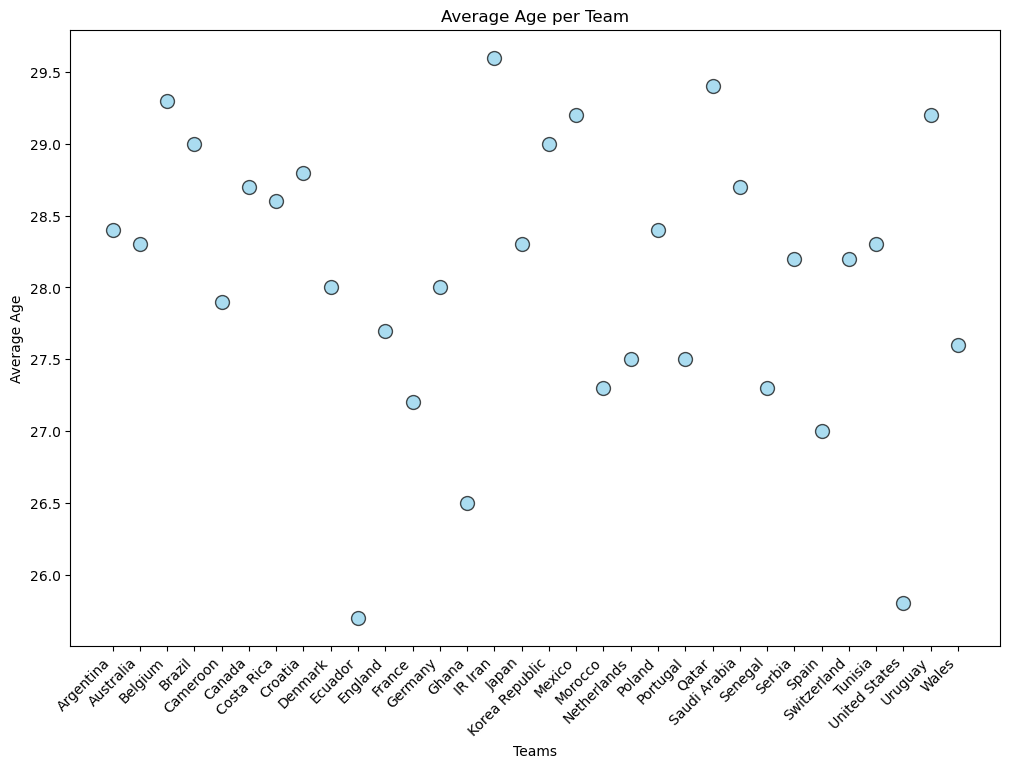

In [89]:
# Assuming players_age_per_team is a DataFrame with columns 'team' and 'avg age per team'
teams = players_age_per_team['team']
avg_age_per_team = players_age_per_team['avg age per team']

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(teams, avg_age_per_team, color='skyblue', edgecolors='black', s=100, alpha=0.7)
plt.xlabel('Teams')
plt.ylabel('Average Age')
plt.title('Average Age per Team')
plt.xticks(rotation=45, ha='right')  # Rotate team names for better readability

# Show the scatter plot with the regression line
plt.show()


**Average Age of Players per Position and Team**

In [21]:
# Calculate the average age of players per position and per team
players_age_per_position_team = merged_df_complete.groupby(['position', 'team'])['age'].mean().round(1).reset_index()

# Rename age column
players_age_per_position_team = players_age_per_position_team.rename(columns={'age': 'avg age per position'})


# Display the result
players_age_per_position_team

,position,team,avg age per position
0,DF,Argentina,28.4
1,DF,Australia,27.7
2,DF,Belgium,31.6
3,DF,Brazil,31.8
4,DF,Cameroon,27.3
...,...,...,...
123,MF,Switzerland,29.2
124,MF,Tunisia,27.2
125,MF,United States,24.2
126,MF,Uruguay,26.4


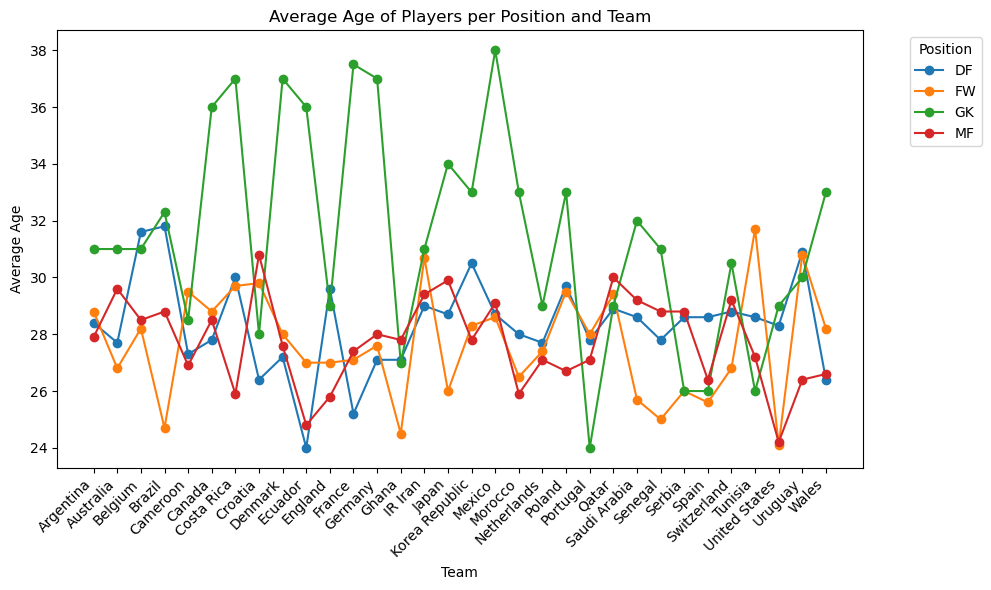

In [62]:
# Plot a line graph for average age of players per position and team 
plt.figure(figsize=(10,6))

# Iterate over each unique position
for position in players_age_per_position_team['position'].unique():
    position_data = players_age_per_position_team[players_age_per_position_team['position'] == position]
    plt.plot(position_data['team'], position_data['avg age per position'], label=position, marker='o')

plt.title('Average Age of Players per Position and Team')
plt.xlabel('Team')
plt.ylabel('Average Age')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [61]:
# Calculate the average age of players per position and per team
players_age_per_position_team = players_age_per_position_team.groupby(['position', 'team'])['avg age per position'].mean().round(1).reset_index()

# Calculate the total average age per position
total_average_age_per_position = players_age_per_position_team.groupby('position')['avg age per position'].mean().round(1).reset_index()

# Display the result
total_average_age_per_position

,position,avg age per position
0,DF,28.3
1,FW,27.7
2,GK,31.4
3,MF,27.8


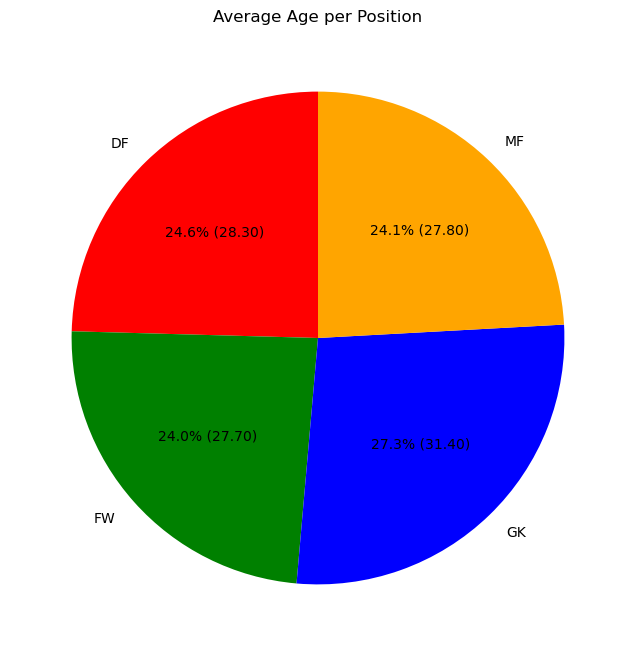

In [78]:
# Plot a pie graph for average age of players per position and team 
positions = ['DF', 'FW', 'GK', 'MF']
avg_age = [28.3, 27.7, 31.4, 27.8]

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
colors = ["red", "green", "blue", "orange"]

# Labeling
ax.pie(avg_age, labels=positions, autopct=lambda p: f'{p:.1f}% ({p * sum(avg_age) / 100:.2f})',
       startangle=90, colors=colors)
ax.set_title('Average Age per Position')

# Show the pie chart
plt.show()